# Wine Quality Prediction Model using Linear Regression

### Importing the required libraries

In [100]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

### Exploring the dataset

In [101]:
wine_data=pd.read_csv('winequality-red.csv')

In [102]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [103]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [104]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [105]:
# this defines the range in which the quality(basis of prediction model) exists and its count in the dataset
wine_data.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

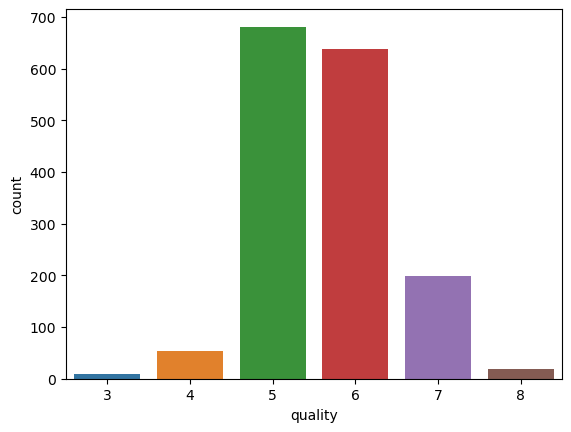

In [106]:
sns.countplot(x='quality', data=wine_data)

In [107]:
# IQR is used to to assess the variability where most of the values lie

Q1 = wine_data.quantile(0.25)
Q3 = wine_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [108]:
# The data point where we have False that means these values are valid
# True indicates presence of an outlier.

print(wine_data < (Q1 - 1.5 * IQR)) |(wine_data > (Q3 + 1.5 * IQR))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [109]:
# Removing outliers

dataset_out = wine_data[~((wine_data < (Q1 - 1.5 * IQR)) |(wine_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [110]:
dataset_out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [111]:
# Correlation matrix to understand feature relationships

correlations = dataset_out.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.113422
volatile acidity       -0.346962
citric acid             0.212133
residual sugar          0.007934
chlorides              -0.190869
free sulfur dioxide    -0.003609
total sulfur dioxide   -0.203374
density                -0.215375
pH                     -0.060288
sulphates               0.413533
alcohol                 0.492551
Name: quality, dtype: float64


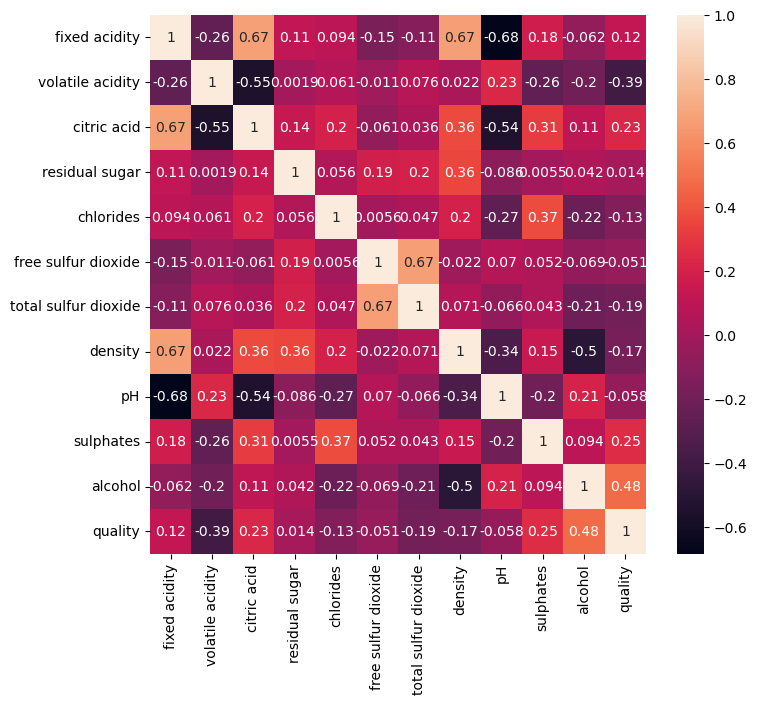

In [112]:
sns.heatmap(wine_data.corr(),annot=True)
plt.gcf().set_size_inches(8,7)

In [113]:
# impact of various factor on quality
correlations.sort_values(ascending=False)

alcohol                 0.492551
sulphates               0.413533
citric acid             0.212133
fixed acidity           0.113422
residual sugar          0.007934
free sulfur dioxide    -0.003609
pH                     -0.060288
chlorides              -0.190869
total sulfur dioxide   -0.203374
density                -0.215375
volatile acidity       -0.346962
Name: quality, dtype: float64

In [114]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [115]:
# taking features with correlation more than 0.05 as input x and quality as target variable y

features = get_features(0.05)
print(features)
x = dataset_out[features]
y = dataset_out['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


[Text(0.5, 0, 'Quality '),
 Text(0, 0.5, 'Alcohol '),
 Text(0.5, 1.0, 'Alcohol %  in different samples')]

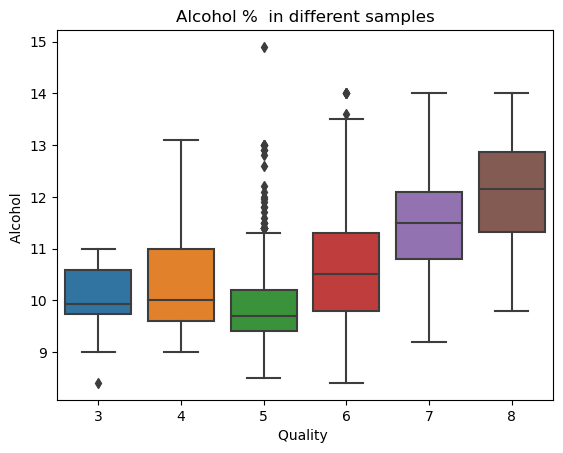

In [116]:
# finding the no of outiers we have in our dataset with properties

bx = sns.boxplot(x='quality', y='alcohol', data = wine_data)
bx.set(xlabel='Quality ', ylabel='Alcohol ', title='Alcohol %  in different samples')

[Text(0.5, 0, 'Quality '),
 Text(0, 0.5, 'Sulphates '),
 Text(0.5, 1.0, 'Sulphates %  in different samples')]

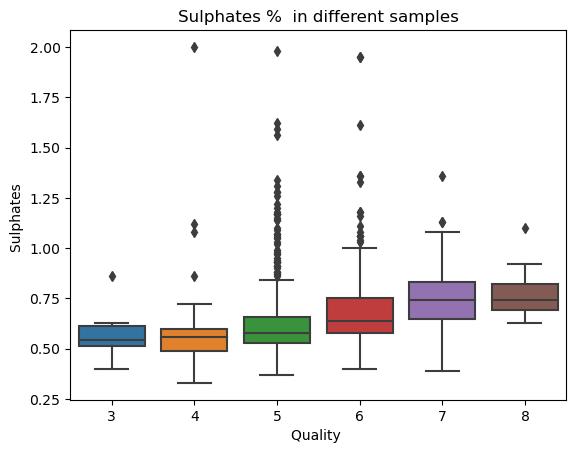

In [117]:
bx = sns.boxplot(x='quality', y='sulphates', data = wine_data)
bx.set(xlabel='Quality ', ylabel='Sulphates ', title='Sulphates %  in different samples')

[Text(0.5, 0, 'Quality '),
 Text(0, 0.5, 'Citric Acid '),
 Text(0.5, 1.0, 'Citric Acid %  in different samples')]

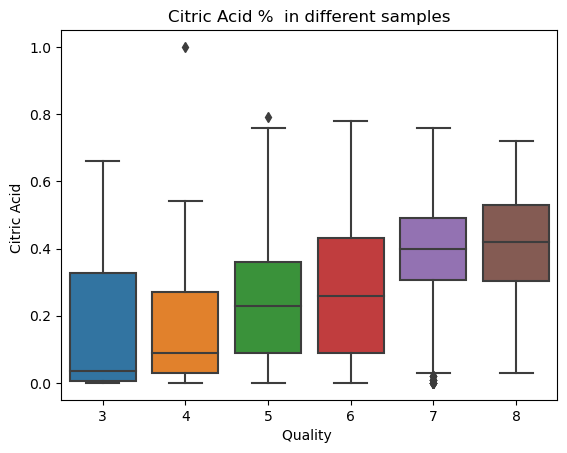

In [118]:
bx = sns.boxplot(x='quality', y='citric acid', data = wine_data)
bx.set(xlabel='Quality ', ylabel='Citric Acid ', title='Citric Acid %  in different samples')

[Text(0.5, 0, 'Quality'),
 Text(0, 0.5, 'Fixed Acidity'),
 Text(0.5, 1.0, 'Fixed Acidity % in different samples')]

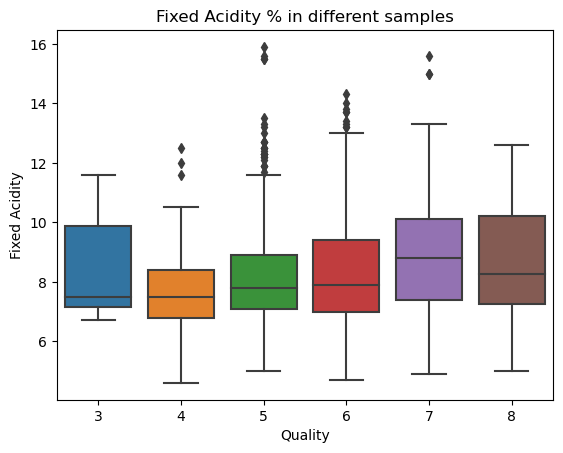

In [119]:
bx = sns.boxplot(x='quality', y='fixed acidity', data = wine_data)
bx.set(xlabel='Quality', ylabel='Fixed Acidity', title='Fixed Acidity % in different samples')

In [120]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2


In [121]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1179, dtype: int64

### Splitting the Dataset

In [122]:
from sklearn.model_selection import train_test_split 

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3)

### Building the linear regression model

In [124]:
from sklearn.linear_model import LinearRegression 

In [125]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [126]:
# this gives the coefficients of the 10 features selected above. 

coeff_df=pd.DataFrame(regressor.coef_,x.columns,columns=['Coefficient'])

In [127]:
coeff_df

,Coefficient
fixed acidity,0.042297
volatile acidity,-0.816828
citric acid,-0.400865
chlorides,-2.684283
total sulfur dioxide,-0.001473
density,-23.748664
pH,-0.472842
sulphates,1.712367
alcohol,0.247527


### Predictions and Visualization

In [128]:
train_pred = regressor.predict(x_train)
train_pred

array([6.14356299, 5.11710037, 5.21197237, 5.13828062, 5.97949972,
       5.66562893, 5.4777587 , 5.75868703, 5.98907913, 5.40401462,
       5.52303708, 5.21113234, 5.38046811, 5.75877598, 5.35007708,
       5.08567146, 5.70418446, 6.15016457, 4.98217495, 6.37902248,
       5.34435775, 5.58388766, 5.56975986, 6.5429133 , 5.95905468,
       5.36649122, 5.24598625, 5.58550515, 5.18791293, 5.25072061,
       5.10187748, 5.00442024, 5.69182774, 5.89415555, 5.21543362,
       5.72691046, 5.08042222, 5.16537087, 6.26665775, 5.11379649,
       4.84031354, 5.32908031, 6.59578316, 5.9574155 , 5.17612261,
       5.52155991, 5.08413929, 6.1392644 , 5.48990749, 5.93825753,
       6.23616917, 5.92388793, 5.7786765 , 6.0650639 , 5.79356716,
       5.78930793, 6.0279377 , 4.86136512, 6.06957539, 5.1960625 ,
       5.82623979, 5.21010511, 5.18855806, 5.17190517, 5.06530766,
       5.2522647 , 5.64833165, 5.66231692, 5.54553416, 5.89096209,
       5.29556643, 5.10200981, 5.02472467, 5.47288678, 5.45596

In [129]:
test_pred = regressor.predict(x_test)
test_pred

array([5.31808602, 5.58846727, 5.83179258, 5.23562426, 6.36492755,
       5.75166188, 5.61511554, 6.51307801, 6.033911  , 5.66126467,
       5.15680921, 5.48432811, 5.53204251, 5.17612261, 5.98484046,
       5.76958525, 6.09867422, 5.24902132, 5.45163284, 5.31035025,
       5.09350311, 5.87828479, 6.40866401, 5.412199  , 5.96442862,
       5.64014045, 5.51992784, 5.13588457, 6.28333602, 5.24519459,
       5.0320614 , 5.27962193, 5.59753018, 5.48395895, 5.58964467,
       6.0845468 , 5.19985585, 6.19604141, 5.34136276, 5.46949893,
       5.52658067, 5.96992765, 5.69237733, 6.52259415, 5.39271847,
       5.25392748, 5.99084808, 5.47407662, 5.49640697, 5.43513813,
       6.32835806, 6.16672701, 6.20060859, 5.78978599, 5.70708754,
       5.27350261, 5.36347142, 5.35513893, 6.26073939, 5.39379095,
       5.13365707, 5.39539395, 5.31604688, 5.55738131, 5.35711922,
       5.41823198, 5.04290802, 5.63751858, 5.05701887, 5.37699259,
       5.4916961 , 6.49050987, 5.67902012, 5.58946844, 5.62497

In [130]:
from sklearn import metrics

In [131]:
train_rmse = metrics.mean_squared_error(train_pred, y_train) ** 0.5
train_rmse

0.5716073011879285

In [132]:
test_rmse = metrics.mean_squared_error(test_pred, y_test) ** 0.5
test_rmse

0.5670861234989517

In [133]:
# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
predicted_data

array([5., 6., 6., 5., 6., 6., 6., 7., 6., 6., 5., 5., 6., 5., 6., 6., 6.,
       5., 5., 5., 5., 6., 6., 5., 6., 6., 6., 5., 6., 5., 5., 5., 6., 5.,
       6., 6., 5., 6., 5., 5., 6., 6., 6., 7., 5., 5., 6., 5., 5., 5., 6.,
       6., 6., 6., 6., 5., 5., 5., 6., 5., 5., 5., 5., 6., 5., 5., 5., 6.,
       5., 5., 5., 6., 6., 6., 6., 6., 6., 5., 6., 5., 6., 5., 7., 6., 6.,
       5., 6., 6., 6., 6., 6., 5., 6., 7., 6., 5., 5., 6., 6., 5., 5., 6.,
       6., 5., 5., 5., 6., 6., 5., 5., 7., 6., 6., 5., 6., 6., 5., 5., 5.,
       5., 5., 7., 7., 5., 6., 6., 6., 6., 6., 6., 5., 6., 6., 5., 6., 6.,
       5., 6., 5., 5., 6., 7., 6., 6., 5., 5., 6., 5., 6., 6., 5., 5., 6.,
       6., 5., 5., 5., 6., 6., 5., 6., 6., 6., 5., 6., 6., 5., 5., 6., 6.,
       5., 6., 5., 5., 5., 6., 5., 7., 6., 6., 6., 5., 6., 5., 5., 5., 6.,
       5., 5., 6., 6., 5., 6., 6., 6., 5., 5., 7., 6., 5., 5., 6., 5., 6.,
       6., 6., 6., 5., 5., 6., 6., 5., 5., 6., 5., 5., 6., 6., 6., 5., 5.,
       5., 6., 6., 6., 6.

In [134]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:',rmse)

Mean Absolute Error: 0.45667750590532963
Mean Squared Error: 0.32158667146506836
Root Mean Squared Error: 0.5670861234989517


In [135]:
from sklearn.metrics import r2_score
r2_score(y_test,test_pred) 

0.4070484025407709

In [136]:
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns = ['Coeffecient']
coeffecients
#These numbers mean that holding all other features fixed, a 1 unit increase in suplhates will lead to an increase of 0.8 in Quality of wine, and similarly for the other features
#These numbers mean that holding all other features fixed, a 1 unit increase in volatile acidity will lead to a decrease of 0.99 in Quality of wine, and similarly for the other features


,Coeffecient
fixed acidity,0.042297
volatile acidity,-0.816828
citric acid,-0.400865
chlorides,-2.684283
total sulfur dioxide,-0.001473
density,-23.748664
pH,-0.472842
sulphates,1.712367
alcohol,0.247527


Text(0.5, 1.0, 'RMSE_Score')

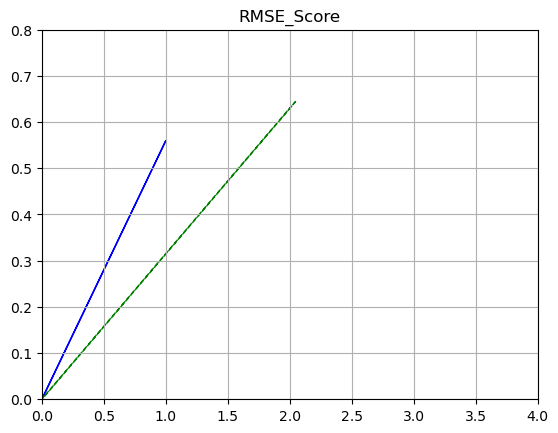

In [137]:
ax=plt.axes()
color1= 'green'
color2= 'blue'
ax.arrow(0,0,1,0.56,head_width=0.00,head_length=0,fc=color2,ec=color2)
ax.arrow(0,0,2,0.63,head_width=0.00,head_length=0.05,fc=color1,ec=color1,linestyle='--')
ax.set_ylim([0,0.8])
ax.set_xlim([0,4])
plt.grid()
plt.title('RMSE_Score')

Text(0.5, 1.0, 'R2_Score')

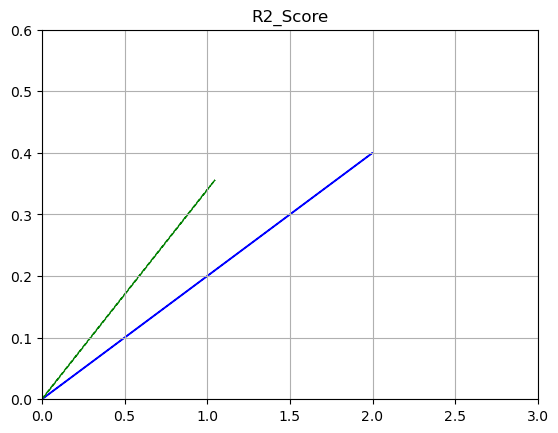

In [138]:
ax=plt.axes()
color1= 'green'
color2= 'blue'
ax.arrow(0,0,2,0.40,head_width=0.00,head_length=0,fc=color2,ec=color2)
ax.arrow(0,0,1,0.34,head_width=0.00,head_length=0.05,fc=color1,ec=color1,linestyle='--')
ax.set_ylim([0,0.6])
ax.set_xlim([0,3])
plt.grid()
plt.title('R2_Score')

Text(0.5, 1.0, 'MAE')

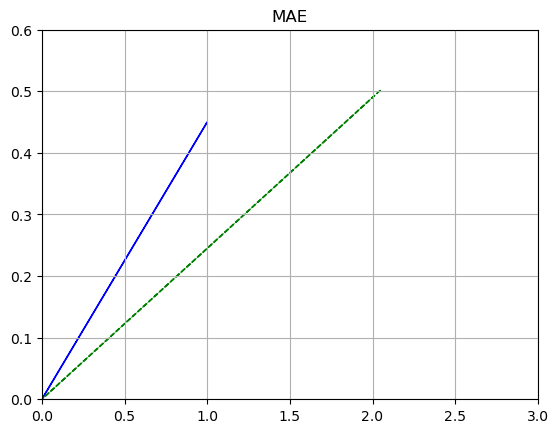

In [139]:
ax=plt.axes()
color1= 'green'
color2= 'blue'
ax.arrow(0,0,1,0.45,head_width=0.00,head_length=0,fc=color2,ec=color2)
ax.arrow(0,0,2,0.49,head_width=0.00,head_length=0.05,fc=color1,ec=color1,linestyle='--')
ax.set_ylim([0,0.6])
ax.set_xlim([0,3])
plt.grid()
plt.title('MAE')